# 행렬의 미분

지금까지는 행렬의 원소로 스칼라 값, 즉 숫자를 사용했지만 사실 다음과 같이 함수도 행렬의 원소가 될 수 있다.

$$ f(x) = \begin{bmatrix} x^2 & 2x \\ \log x & e^{x^2} \end{bmatrix} $$

이는 함수의 종속 변수 $y$가 행렬인 경우라고 볼 수 있다. 반대로 여러개의 입력을 가지는 다변수 함수는 함수의 독립 변수가 벡터(열 행렬)인 경우로 볼 수 있다.

$$ f(x_1, x_2) = f\left( \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right) = f(x) $$

이러한 행렬을 입력이나 출력으로 가지는 함수를 미분하는 것을 행렬 미분이라고 한다. 사실 행렬 미분은 정확하게는 미분이 아닌 편미분(partial derivative)이지만 여기에서는 편의상 미분이라고 쓰겠다. 또한 행렬 미분에는 분자 중심 표현법(Numerator-layout notation)과 분모 중심 표현법(Denominator-layout notation) 두 가지가 있는데 데이터 분석에는 주로 분모 중심 표현법이 사용되므로 여기에서는 분모 중심 표현법으로 서술한다.

또한 스칼라와 벡터/행렬의 구분을 돕기 위해 이 절에 한하여 벡터/행렬은 $\mathbf{x}$, $\mathbf{A}$처럼 볼드체로 표기한다.

## 스칼라를 벡터로 미분하는 경우

데이터 분석에서는 함수의 종속 변수 $y$가 스칼라이고 독립 변수 $x$가 (다차원)벡터인 다변수 함수를 사용하는 경우가 많다. 따라서 편미분 값도 $\frac{\partial y}{\partial x_1}, \frac{\partial y}{\partial x_2}, \cdots$ 등으로 여러 개가 존재한다. 

이렇게 스칼라를 벡터로 미분하는 경우에는 결과를 열 벡터로 표시한다. 이렇게 만들어진 벡터를 **그레디언트 벡터(gradient vector)**라고 하고 $\nabla y$로 표기한다.


$$
\nabla y = 
\frac{\partial y}{\partial \mathbf{x}} =
\begin{bmatrix}
\dfrac{\partial y}{\partial x_1}\\
\dfrac{\partial y}{\partial x_2}\\
\vdots\\
\dfrac{\partial y}{\partial x_N}\\
\end{bmatrix}
$$

예를 들어 다음과 같은 다변수 함수 

$$ f(x, y) = 2x^2 + 6xy + 7y^2 - 26x - 54y + 107 $$

에 대한 그레디언트 벡터를 구하면

$$
\nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\dfrac{\partial f}{\partial y}\\
\end{bmatrix} =
\begin{bmatrix}
4x + 6y - 26\\
6x + 14y - 54\\
\end{bmatrix}
$$

가 된다.

#### 연습 문제 1

다음 함수의 그레디언트 벡터를 구하라

1.
$$ f(x, y, z) = x + y + z $$

2.
$$ f(x, y, z) = xyz $$

2차원의 경우를 예로 들어 그레디언트 벡터를 표시하는 법을 알자보자. 2개의 독립 변수를 가지는 2차원 함수 $f(x, y)$는 평면상에서 컨투어(contour) 플롯으로 나타낼 수 있다. 그리고 입력 변수 $x, y$ 위치에서의 그레디언트 벡터 $\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}$는 그 위치를 원점으로 하는 화살표로 표현할 수 있다. 그리고 그레디언트 벡터의 방향은 편미분 성분 $\frac{\partial f}{\partial x}$와 $\frac{\partial f}{\partial y}$의 부호에 의해 결정된다.

만약 어떤 위치 $x, y$에서 $x$가 증가할수록 $f$가 커지면 도함수 $\frac{\partial f}{\partial x}$은 양수이다. 반대로 $y$가 증가할수록 $f$가 커지면 도함수 $\frac{\partial f}{\partial x}$은 음수이다. 벡터는 2차원 평면에서 화살표로 나타낼 수 있다. 가로 성분이 양수이고 세로 성분이 음수인 화살표는 우측 아래를 가리키는 화살이 될 것이다. 

이렇게 컨투어 플롯 위에 그레디언트 벡터를 화살표로 나타낸 것을 플롯을 **퀴버(quiver) 플롯**이라고 한다. 퀴버 플롯에서 그레디언트 벡터는 다음과 같은 특성을 지닌다.

* 그레디언트 벡터의 방향은 함수 곡면의 기울기가 가장 큰 방향, 즉 단위 길이당 함수 값(높이)이 가장 크게 증가하는 방향을 가리킨다.
* 그레디언트 벡터의 방향은 등고선(isoline)의 방향과 직교한다.
* 그레디언트 벡터의 크기는 기울기를 의미한다. 즉 벡터의 크기가 클 수록 함수 곡면의 기울기가 커진다.

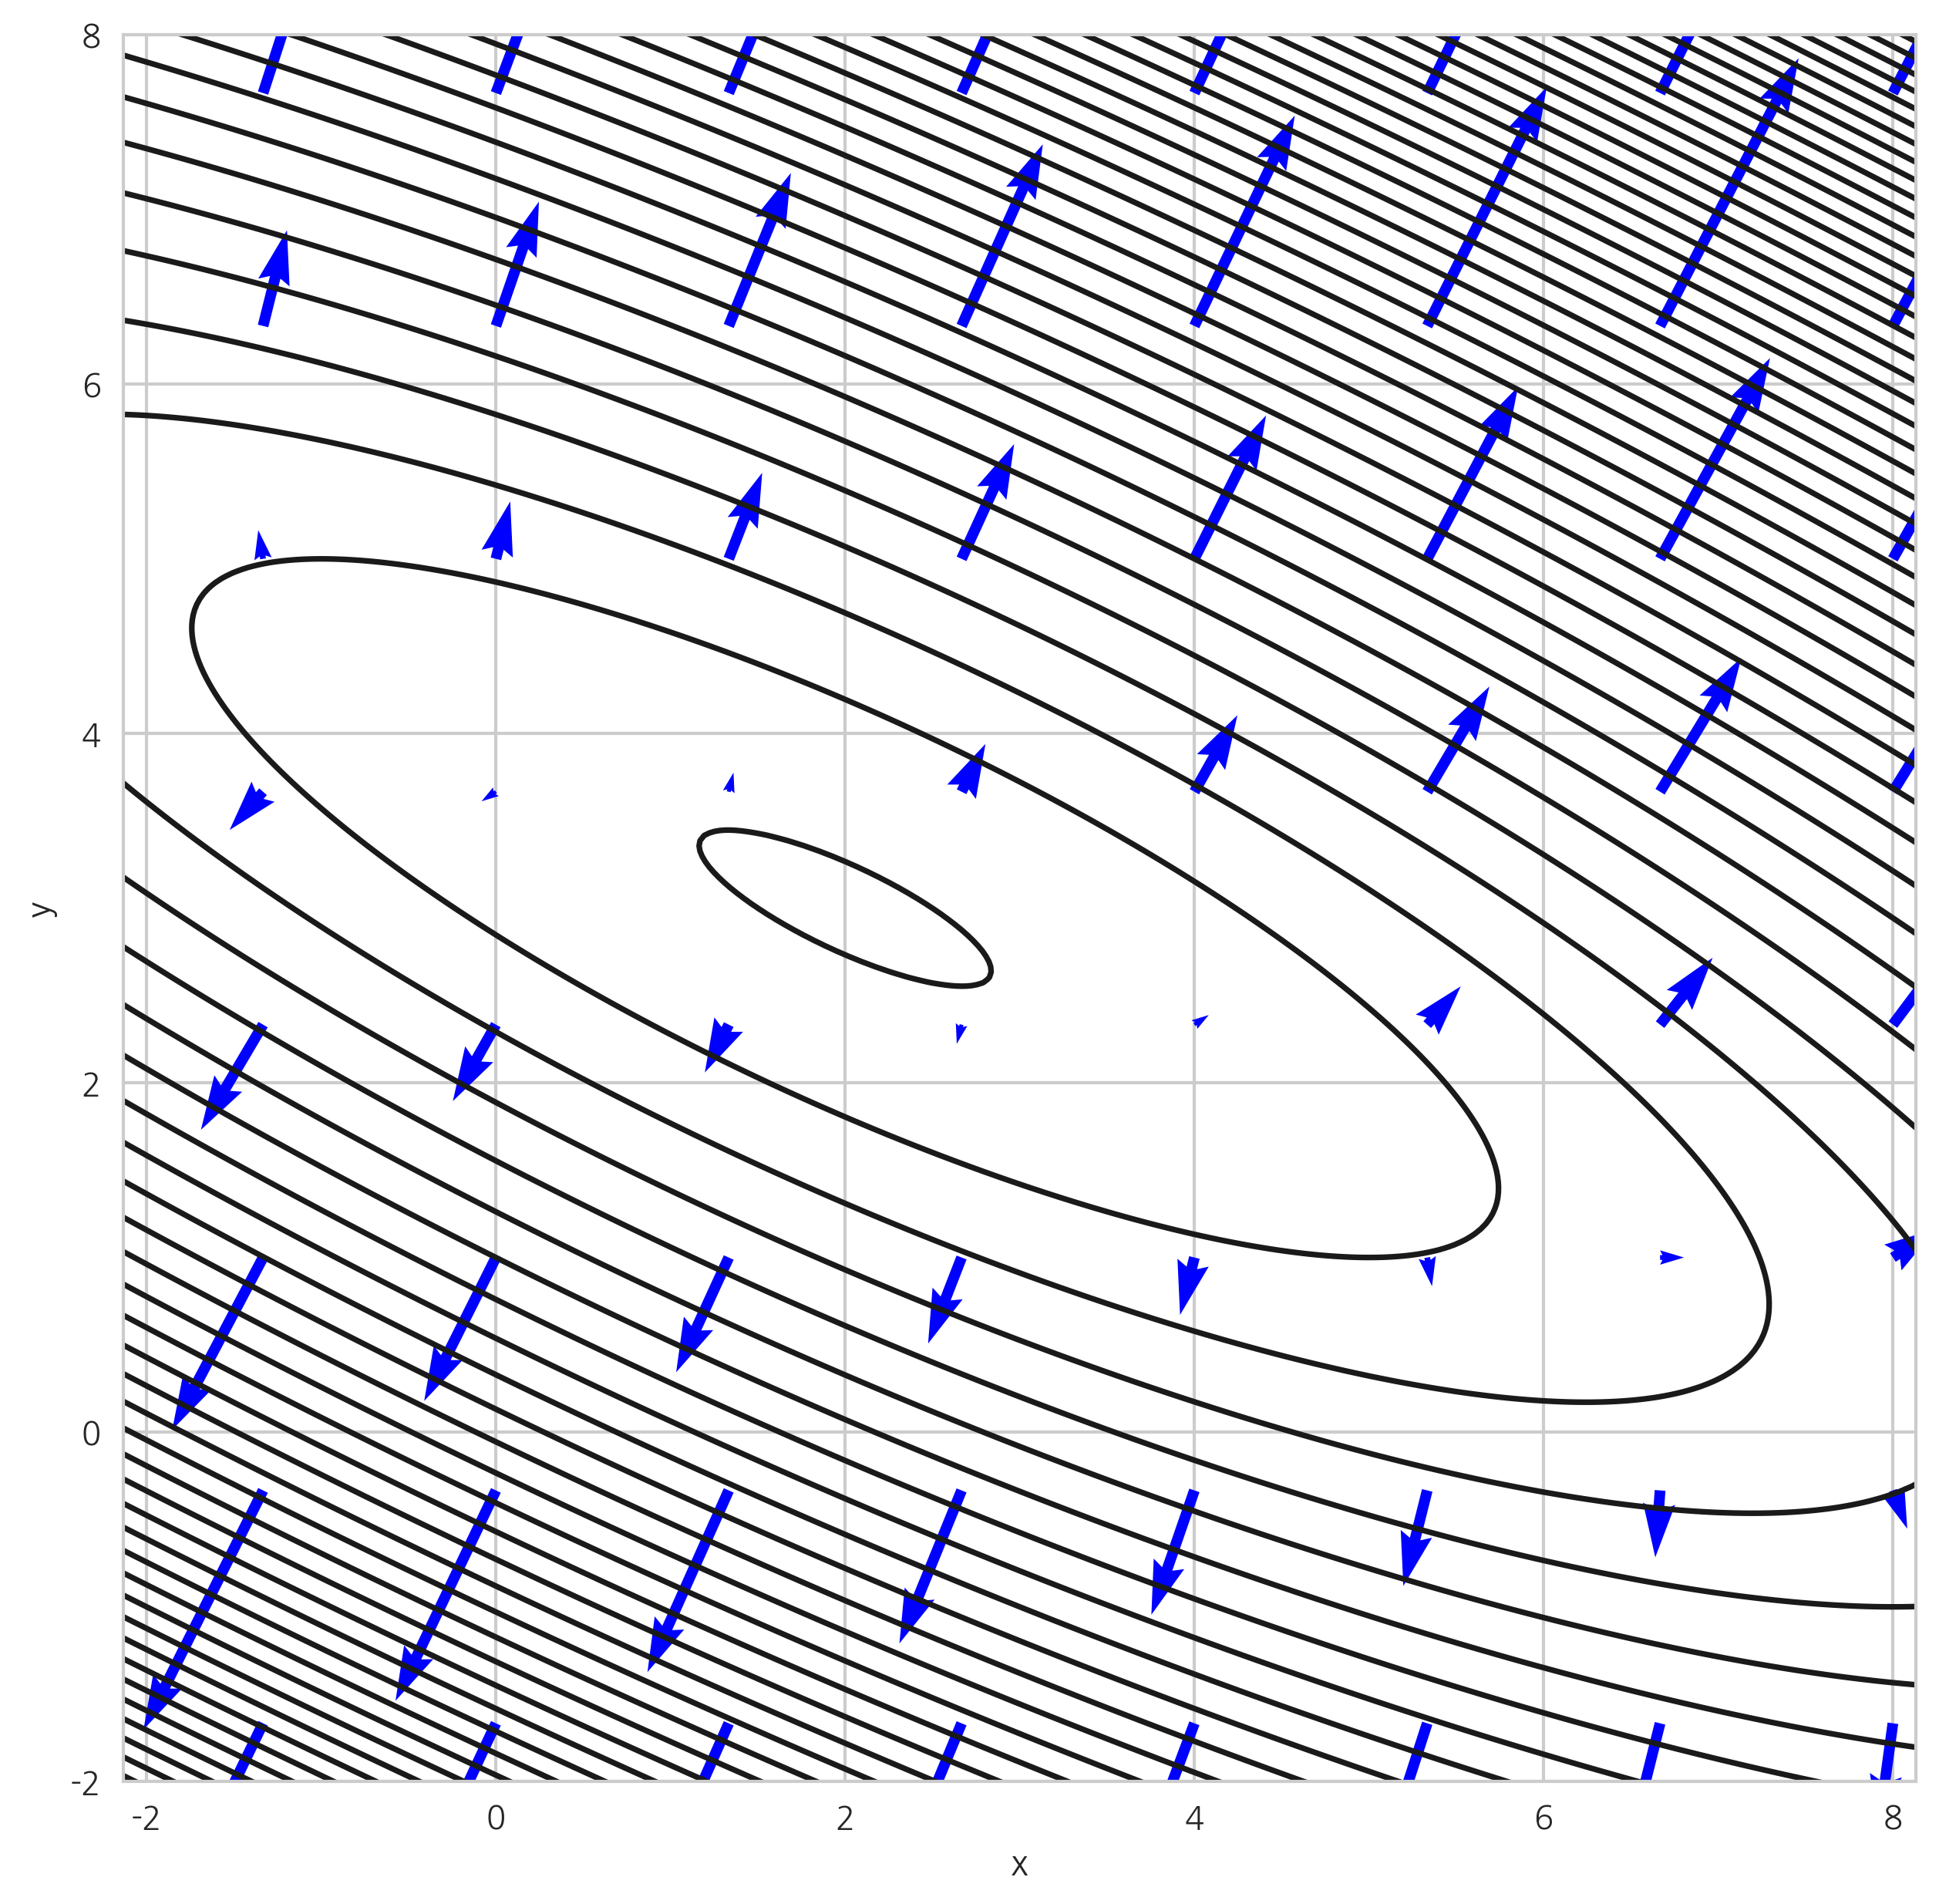

In [7]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-5, 10, 500)
yy = np.linspace(-5, 10, 500)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)
def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)

plt.figure(figsize=(10,10))
levels = np.linspace(0, 600, 61)
levels[0] = 0.5
plt.contour(X, Y, Z, levels=levels, colors='k')
plt.quiver(X2, Y2, GX, GY, color='blue', scale=500)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.show()

#### 연습 문제 2

위 2차원 함수로 표현되는 지형을 상상하라. 이 지형의 어느 지점에 공을 두었다면 어떠한 경로로 공이 지나갈지 생각하여 퀴버 플롯에 경로를 그려라.

## 행렬 미분 법칙

다변수 함수를 미분하여 그레디언트를 구할 때는 다음 두가지 법칙이 유용하게 쓰인다.

### 벡터 미분 규칙 1: 선형 모형

선형 모형을 미분하면 가중치 벡터가 된다.


$$\frac{\partial \mathbf{w}^{T}\mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{x}^{T}\mathbf{w}}{\partial \mathbf{x}} = \mathbf{w}$$ 

(증명)

$$ 
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial \mathbf{x}}=
\begin{bmatrix}
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial (w_1 x_1 + \cancel{w_2 x_2} + \cdots + \cancel{w_N x_N})}{\partial x_1} \\
\dfrac{\partial (\cancel{w_1 x_1} + w_2 x_2 + \cdots + \cancel{w_N x_N})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\cancel{w_1 x_1} + \cancel{w_2 x_2} + \cdots + w_N x_N)}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_N \\
\end{bmatrix}
= \mathbf{w} 
$$

### 벡터 미분 규칙 2: 이차 형식

이차 형식을 미분하면 행렬과 벡터의 곱으로 나타난다.



$$\frac{\partial \mathbf{x}^{T}\mathbf{A}\mathbf{x}}{\partial \mathbf{x}} = (\mathbf{A} + \mathbf{A}^{T})\mathbf{x}$$

(증명)


$$ 
\begin{eqnarray}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial \mathbf{x}}
&=&
\begin{bmatrix}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_1} \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial 
\left(
\begin{matrix}
a_{11}x_1x_1 + a_{12}x_1x_2 + \cdots + a_{1N}x_1x_N + \\
a_{21}x_2x_1 + \cancel{a_{22}x_2x_2} + \cdots + \cancel{a_{2N}x_2x_N} + \\
\cdots  \\
a_{N1}x_Nx_1 + \cancel{a_{N2}x_Nx_2} + \cdots + \cancel{a_{NN}x_Nx_N} 
\end{matrix}
\right)}{\partial x_1} \\
\dfrac{\partial 
\left(
\begin{matrix}
\cancel{a_{11}x_1x_1} + a_{12}x_1x_2 + \cdots + \cancel{a_{1N}x_1x_N} + \\
a_{21}x_2x_1 + a_{22}x_2x_2 + \cdots + a_{2N}x_2x_N + \\
\cdots  \\
\cancel{a_{N1}x_Nx_1} + a_{N2}x_Nx_2 + \cdots + \cancel{a_{NN}x_Nx_N}
\end{matrix}
\right)}{\partial x_2} \\
\vdots \\
\end{bmatrix} 
\\
&=&
\begin{bmatrix}
\begin{matrix}
2a_{11}x_1 + a_{12}x_2 + \cdots + a_{1N}x_N + \\
a_{21}x_2 + 0 + \cdots + 0 \\
\cdots  \\
a_{N1}x_N + 0 + \cdots + 0 
\end{matrix}
\\ \\ 
\begin{matrix}
0 + a_{12}x_2 + \cdots + 0 + \\
a_{21}x_1 + 2a_{22}x_2 + \cdots + a_{2N}x_N + \\
\cdots  \\
0 + a_{N2}x_N + \cdots + 0
\end{matrix}
 \\
\vdots \\
\end{bmatrix} 
\\ \\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i + \sum_{i=1}^{N} a_{i1} x_i\\
\sum_{i=1}^{N} a_{2i} x_i + \sum_{i=1}^{N} a_{i2} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i + \sum_{i=1}^{N} a_{iN} x_i\\
\end{bmatrix} \\ \\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i\\
\sum_{i=1}^{N} a_{2i} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i\\
\end{bmatrix}
+
\begin{bmatrix}
\sum_{i=1}^{N} a_{i1} x_i \\
\sum_{i=1}^{N} a_{i2} x_i \\
\vdots \\
\sum_{i=1}^{N} a_{iN} x_i \\
\end{bmatrix} \\ \\
&=&
\mathbf{A} \mathbf{x}  + \mathbf{A}^T \mathbf{x} 
=
(\mathbf{A} + \mathbf{A}^T)\mathbf{x} 
\end{eqnarray}
$$




위의 두 가지 경우는 1차 다항식과 2차 다항식에 대한 스칼라 미분과 비슷하다. 두 경우를 비교해 보면 이 공식을 외우는데 도움이 된다.

| 스칼라 미분                        | 벡터/행렬 미분                           |
| ---------------------------------- | ---------------------------------------- |
| $$ax \;\; \rightarrow \;\; a$$     | $$w^Tx \;\; \rightarrow \;\; w$$         |
| $$ax^2 \;\; \rightarrow \;\; 2ax$$ | $$x^TAx \;\; \rightarrow \;\; (A+A^T)x$$ |

## 벡터를 스칼라로 미분하는 경우

반대로 함수의 종속 변수 $y$가 (다차원)벡터이고 독립 변수 $x$가 스칼라인 경우는 함수가 여러 개라고 보는 것과 마찬가지이다.

$$ y_1 = f_1(x) $$

$$ y_2 = f_2(x) $$

$$ \vdots $$

$$ y_m = f_m(x) $$

$$ \downarrow $$

$$
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_M \\
\end{bmatrix}
= \mathbf{f}(x)
$$


따라서 미분 값도 $\frac{\partial y_1}{\partial x}, \frac{\partial y_2}{\partial x}, \cdots$ 등으로 여러 개가 존재한다. 

벡터를 스칼라로 미분하는 경우에는 결과를 행 벡터로 표시한다.


$$
\frac{\partial \mathbf{y}}{\partial x} = \left[
\frac{\partial y_1}{\partial x}
\frac{\partial y_2}{\partial x}
\cdots
\frac{\partial y_M}{\partial x}
\right].
$$

## 벡터를 벡터로 미분하는 경우

벡터 $\mathbf{y}$를 벡터 $\mathbf{x}$로 미분하면 미분을 당하는 벡터 $\mathbf{y}$의 원소가 여러개($i=1, \dots, N$)이고 미분을 하는 벡터 $\mathbf{x}$의 원소도 여러개($j=1, \dots, M$)이므로 미분의 결과로 나온 도함수는 2차원 배열 즉, 행렬이 된다.

벡터를 벡터로 미분할 때는 벡터를 스칼라로 미분할 때와 달리 미분을 당하는 원소의 인덱스를 행 인덱스, 미분을 하는 원소의 인덱스를 열 인덱스로 한다. 

$$
\dfrac{\partial \mathbf{y}}{\partial \mathbf{x}}
= 
\begin{bmatrix}
\dfrac{\partial y_1}{\partial \mathbf{x}} \\
\dfrac{\partial y_2}{\partial \mathbf{x}} \\
\vdots \\
\dfrac{\partial y_N}{\partial \mathbf{x}}
\end{bmatrix}
=
\begin{bmatrix}
\dfrac{\partial \mathbf{y}}{\partial x_1} &
\dfrac{\partial \mathbf{y}}{\partial x_2} &
\cdots &
\dfrac{\partial \mathbf{y}}{\partial x_M}
\end{bmatrix}
= 
\begin{bmatrix}
\dfrac{\partial y_1}{\partial x_1} & \dfrac{\partial y_1}{\partial x_2} & \cdots & \dfrac{\partial y_1}{\partial x_M} \\
\dfrac{\partial y_2}{\partial x_1} & \dfrac{\partial y_2}{\partial x_2} & \cdots & \dfrac{\partial y_2}{\partial x_M} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial y_N}{\partial x_1} & \dfrac{\partial y_N}{\partial x_2} & \cdots & \dfrac{\partial y_N}{\partial x_M} \\
\end{bmatrix}
$$

### 벡터 미분 규칙 3: 행렬과 벡터의 곱의 미분

행렬 $A$와 벡터 $x$의 곱 $Ax$를 벡터 $x$로 미분하면 행렬 $A$가 된다.

$$ \dfrac{\partial (\mathbf{Ax})}{\partial \mathbf{x}} = \mathbf{A} $$

(증명)

$$
\mathbf{Ax} = \mathbf{c_1}x_1 + \mathbf{c_2}x_2 + \cdots + \mathbf{c_M}x_M
$$

$$
\begin{eqnarray}
\dfrac{\partial (\mathbf{Ax})}{\partial \mathbf{x}}
&=&
\begin{bmatrix}
\dfrac{\partial (\mathbf{Ax})}{\partial x_1} &
\dfrac{\partial (\mathbf{Ax})}{\partial x_2} &
\cdots &
\dfrac{\partial (\mathbf{Ax})}{\partial x_M}
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial (\mathbf{c_1}x_1 + \mathbf{c_2}x_2 + \cdots + \mathbf{c_M}x_M)}{\partial x_1} &
\dfrac{\partial (\mathbf{c_1}x_1 + \mathbf{c_2}x_2 + \cdots + \mathbf{c_M}x_M)}{\partial x_2} &
\cdots &
\dfrac{\partial (\mathbf{c_1}x_1 + \mathbf{c_2}x_2 + \cdots + \mathbf{c_M}x_M)}{\partial x_M}
\end{bmatrix} \\
&=& 
\begin{bmatrix}
\mathbf{c_1} &
\mathbf{c_2} &
\cdots &
\mathbf{c_M} &
\end{bmatrix} \\
&=& A
\end{eqnarray}
$$

함수의 종속 변수와 독립 변수가 모두 벡터(다차원) 데이터인 경우에는 독립 변수 각각과 종속 변수 각각의 조합에 대해 모두 미분이 존재한다. 따라서 도함수는 행렬 형태가 된다. 이렇게 만들어진 도함수의 행렬을 **자코비안 행렬(Jacobian matrix)** 이라고 한다. 자코비안 행렬을 만들때는 벡터를 스칼라로 미분하는 경우나 스칼라를 벡터를 미분하는 경우와 행/열의 방향이 다르다는 점에 유의한다.




$$
\mathbf J = \frac{\partial \mathbf y}{\partial \mathbf x} = 
\begin{bmatrix}
\dfrac{\partial y_1}{\partial \mathbf x}^T \\ \vdots \\ \dfrac{\partial y_M}{\partial \mathbf x}^T 
\end{bmatrix} =
\begin{bmatrix}
\nabla y_1^T \\ \nabla y_2^T \\ \vdots \\ \nabla y_M^T \\ 
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial y_1}{\partial x_1} & \cdots & \dfrac{\partial y_1}{\partial x_N}\\
\vdots & \ddots & \vdots\\
\dfrac{\partial y_M}{\partial x_1} & \cdots & \dfrac{\partial y_M}{\partial x_N} 
\end{bmatrix}
$$

#### 연습 문제 3

다음 함수의 자코비안 행렬을 구하라

$$ 
f(x) = 
\begin{bmatrix}
\sum_i^N x_i \\
\prod_i^N x_i 
\end{bmatrix}
$$

다변수 함수의 2차 도함수는 그레디언트 벡터를 독립 변수 벡터로 미분한 것으로 **헤시안 행렬(Hessian matrix)**이라고 한다. 

헤시안 행렬은 그레디언트 벡터의 자코비안 행렬의 전치 행렬로 정의한다.

$$
H = J(\nabla f(x))^T
$$

풀어쓰면 다음과 같다.

$$
H_{ij} = \dfrac{\partial^2 f}{\partial x_i\,\partial x_j}
$$

즉,

$$
H = \begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_N} \\
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_N} \\
  \vdots & \vdots & \ddots & \vdots \\
  \dfrac{\partial^2 f}{\partial x_N\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_N\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_N^2}
\end{bmatrix}
$$


함수가 연속이고 미분가능한 함수라면 헤시안 행렬은 대칭행렬이 된다.

#### 연습 문제 4

다음 함수의 헤시안 행렬을 구하라

$$ 
f(x) = \sum_i^N x_i^2
$$

## 스칼라를 행렬로 미분

종속 변수가 스칼라 값이고 독립 변수가 행렬인 경우에는 도함수 행렬의 모양이 독립 변수 행렬 $X$와 같다. 

$$
\frac{\partial y}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial y}{\partial x_{1,1}} & \frac{\partial y}{\partial x_{1,2}} & \cdots & \frac{\partial y}{\partial x_{1,N}}\\
\frac{\partial y}{\partial x_{2,1}} & \frac{\partial y}{\partial x_{2,2}} & \cdots & \frac{\partial y}{\partial x_{2,N}}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial y}{\partial x_{M,1}} & \frac{\partial y}{\partial x_{M,2}} & \cdots & \frac{\partial y}{\partial x_{M,N}}\\
\end{bmatrix}
$$

### 행렬 미분 규칙 4: 행렬 곱의 대각성분

두 정방 행렬을 곱해서 만들어진 행렬의 대각성분(trace)는 스칼라이다. 이 스칼라를 곱셈의 뒤 행렬로 미분하면 앞의 행렬의 전치 행렬이 나온다.


$$ 
\dfrac{\partial \text{tr} (\mathbf{W}\mathbf{X})}{\partial \mathbf{X}} = \mathbf{W}^T,
\;\; (\mathbf{W} \in \mathbf{R}^{N \times N}, \mathbf{X} \in \mathbf{R}^{N \times N}) $$

(증명)

$$ \text{tr}(\mathbf{W}\mathbf{X}) = \sum_{i=1}^N \sum_{j=1}^N w_{ji} x_{ij} $$

$$ \dfrac{\partial \text{tr} (\mathbf{W}\mathbf{X})}{\partial x_{ij}} = w_{ji} $$ 

### 행렬 미분 규칙 5: 행렬식의 로그

행렬식(determinant)는 스칼라이고 이 값의 로그 값도 스칼라이다. 이 값을 원래의 행렬로 미분하면 원래 행렬의 역행렬의 전치 행렬이 된다.

$$ \dfrac{\partial \log | \mathbf{X} | }{\partial \mathbf{X}} = (\mathbf{X}^{-1})^T $$

(증명)

행렬식의 정의에서

$$ \dfrac{\partial}{\partial x_{i,j}} \det X = C_{i,j} $$

행렬식과 역행렬의 관계에서 

$$ \dfrac{\partial}{\partial X} \det X = C = (\det X) (X^{-1})^T  $$

로그 함수 공식에 대입하면 

$$ \dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} = \dfrac{(\det X) (X^{-1})^T}{\det X} = (X^{-1})^T $$